# 🔻 O Efeito do tamanho da amostra no Erro Padrão

Quanto maior o tamanho da amostra (
n), menor o erro padrão. Isso significa que, com amostras maiores, a precisão da estimativa da média aumenta.

Podemos criar um gráfico para visualizar como o erro amostral se comporta com diferentes tamanhos de amostra:

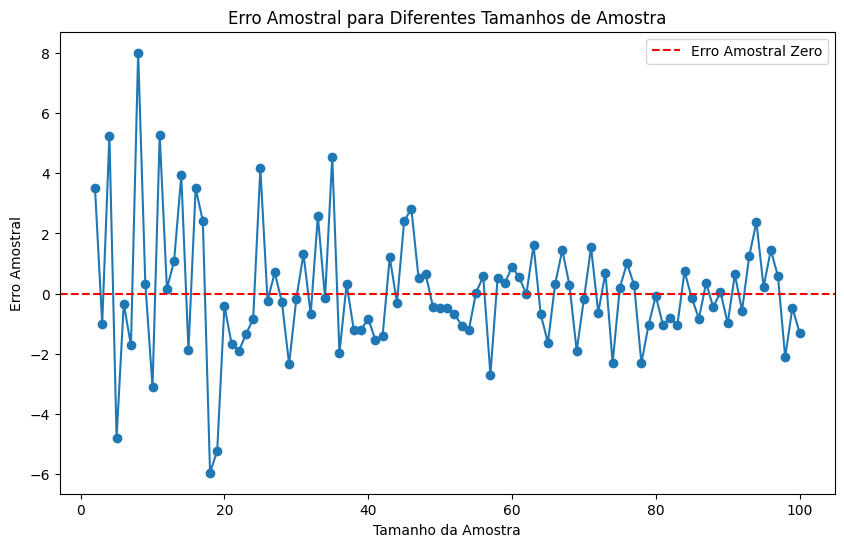

In [ ]:
import matplotlib.pyplot as plt

# Coletando várias amostras para analisar o erro amostral
amostra_erros = []
amostra_tamanhos = range(2, 101)

for n in amostra_tamanhos:
    sample = np.random.choice(population, size=n, replace=False)
    sample_mean = np.mean(sample)
    erro_amostral = sample_mean - pop_mean
    amostra_erros.append(erro_amostral)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(amostra_tamanhos, amostra_erros, marker='o')
plt.axhline(0, color='red', linestyle='--', label='Erro Amostral Zero')
plt.title("Erro Amostral para Diferentes Tamanhos de Amostra")
plt.xlabel("Tamanho da Amostra")
plt.ylabel("Erro Amostral")
plt.legend()
plt.show()


Resumo
* O erro amostral é inevitável quando usamos amostras para estimar características populacionais.

* O erro padrão das médias amostrais reduz conforme o tamanho da amostra aumenta.

* O Teorema do Limite Central nos garante que a distribuição das médias amostrais se aproxima de uma normal, e que a média das médias amostrais converge para a média populacional.

A próxima simulação demonstra o efeito do tamanho da amostra no formato da distribuição amostral da média.

Representada no gráfico superior está a população, que às vezes é chamada de distribuição pai. Duas distribuições amostrais da média, associadas aos seus respectivos tamanhos amostrais, serão criadas no segundo e terceiro gráficos.

Tanto para a distribuição populacional quanto para as distribuições amostrais, sua média e o desvio padrão são representados graficamente na própria distribuição de frequência. A barra vertical azul abaixo do eixo X indica onde o valor médio cai. A linha vermelha começa a partir desse valor médio e se estende por um desvio padrão em comprimento em ambas as direções. Os valores da média e do desvio padrão também são fornecidos à esquerda do gráfico. Observe que a forma numérica de uma propriedade corresponde à sua forma gráfica em cores. Além disso, a assimetria e a curtose de cada distribuição também são fornecidas à esquerda. Essas duas variáveis ​​são determinadas pelo formato da distribuição. A assimetria e a curtose para uma distribuição normal são ambas 0.

Nesta simulação, você precisa primeiro especificar uma população (o padrão é distribuição uniforme). Anote a assimetria e a curtose da população. Em seguida, escolha dois tamanhos de amostra diferentes (os padrões são N=2 e N=10) e faça uma amostra de um número suficientemente grande de amostras até que as distribuições de amostragem mudem relativamente pouco com amostras adicionais (cerca de 50.000 amostras). Observe a forma geral das duas distribuições de amostragem e compare ainda mais suas médias, desvios-padrão, assimetria e curtose. Altere os tamanhos de amostra e repita o processo algumas vezes. Você observa uma regra geral sobre o efeito do tamanho da amostra na forma da distribuição de amostragem?

Você também pode testar o efeito do tamanho da amostra com populações de outra forma (uniformes, assimétricas ou personalizadas).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, norm, chi2
import pandas as pd

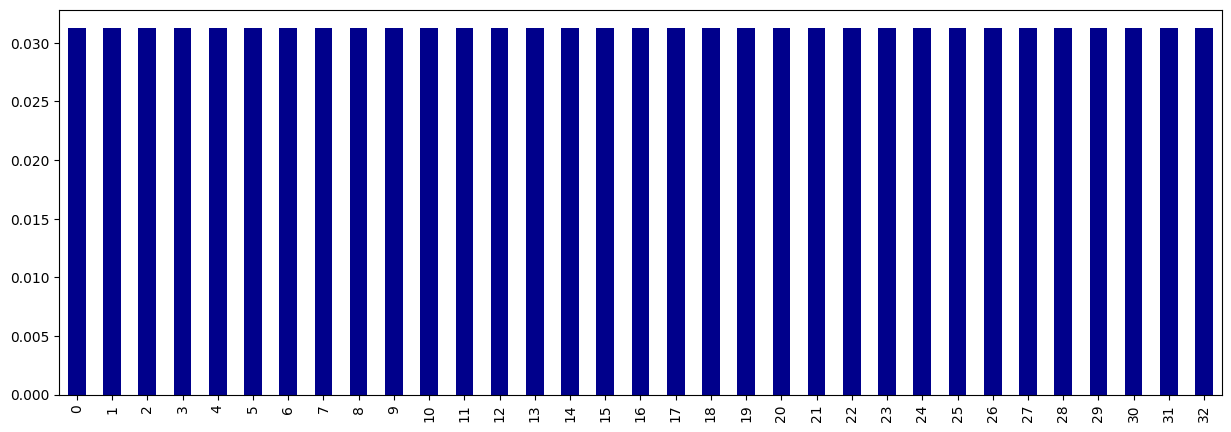

In [ ]:
dist = uniform(0, 32)
#dist = norm(16, 6)
#dist = chi2(8)

x_axis = np.arange(0, 33, 1)
_ = pd.Series(list(dist.pdf(x_axis)),
              index=range(33)).plot.bar(figsize=(15, 5),
                                        color='darkblue')

In [ ]:
dist.mean()

np.float64(16.0)

In [ ]:
dist.std()

np.float64(9.237604307034012)

Média das médias para N=2: 16.02
Média das médias para N=10: 16.02
Média das médias para N=100: 16.01


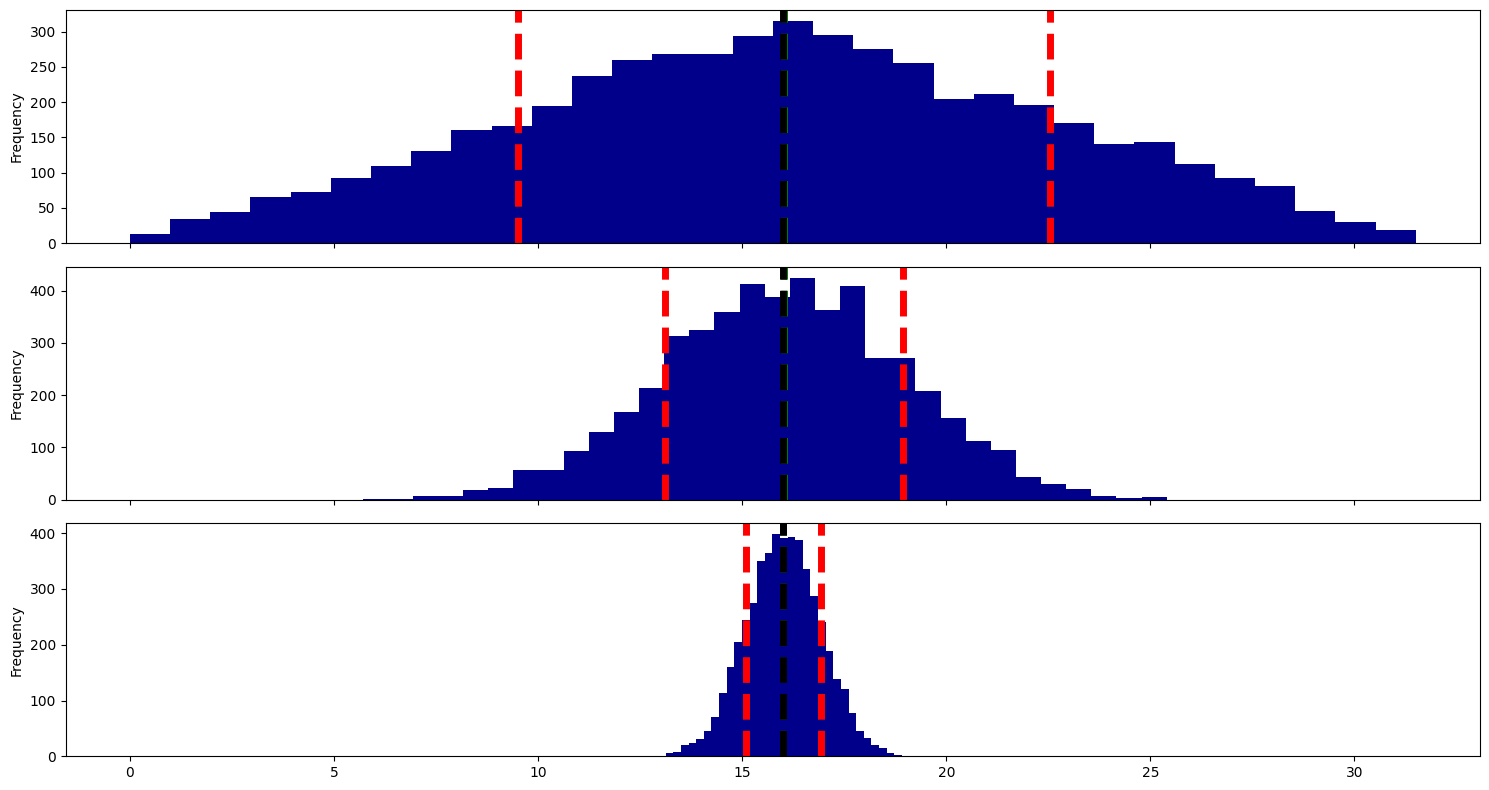

In [ ]:
out = []

# Criando uma lista de subplots de maneira robusta
figure, ax = plt.subplots(len(N), sharex=True, figsize=(15, 8))

# Garantindo que ax seja sempre um array
if len(N) == 1:
    ax = [ax]

for i, n in enumerate(N):
    means = []
    for _ in range(m):
        ser = pd.Series(list(dist.rvs(size=n))).apply(round)
        means.append(ser.mean())

    ser_means = pd.Series(means)
    ser_means.plot(kind='hist', bins=32, color='darkblue', ax=ax[i], rwidth=1)

    ax[i].axvline(x=ser_means.mean(), color='g', linestyle='--', linewidth=5)
    ax[i].axvline(x=ser_means.median(), color='k', linestyle='--', linewidth=5)
    ax[i].axvline(x=ser_means.mean() - ser_means.std(), color='r', linestyle='--', linewidth=5)
    ax[i].axvline(x=ser_means.mean() + ser_means.std(), color='r', linestyle='--', linewidth=5)

    print(f"Média das médias para N={n}: {ser_means.mean():.2f}")

plt.tight_layout()
plt.show()


A distribuição das médias amostrais se torna mais concentrada ao redor da média verdadeira da população.

A dispersão da distribuição das médias amostrais diminui, resultando em um menor erro padrão.

Isso acontece porque amostras grandes têm maior probabilidade de capturar a variabilidade da população, o que gera uma distribuição de médias mais simétrica e com menor variabilidade.

**OBS: Número de Amostras (Repetições):**

* Tamanho da amostra e número de amostras são coisas diferentes.

* Aumentar o número de amostras garante uma distribuição mais estável e regular, com formato de sino mais evidente.

* Isso porque um número grande de amostras garante uma média das médias estável e uma curva com formato de sino mais evidente.